In [1]:
# Import libraries

import logging
import os
from pathlib import Path
import pandas as pd

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [3]:

script_dir = Path().resolve().parent
logger.info(f"Script directory: {script_dir}")
data_json = script_dir / "data/processed/topic_sampled_jul23_vision_llava.jsonl"
logger.info(f"Data jsonl path: {data_json}")

# convert jsonl to csv
df = pd.read_json(data_json, lines=True)
df.head(15)

2024-09-15 13:54:33,311 - INFO - Script directory: /home/vsl333/frame-align
2024-09-15 13:54:33,312 - INFO - Data jsonl path: /home/vsl333/frame-align/data/processed/topic_sampled_jul23_vision_llava.jsonl


,uuid,image_file,headline,caption,actors,symbols,expressions,gender,frame
0,a856fbc0-8ab5-44ad-a3c5-83147b3f5dd9,https://assets1.cbsnewsstatic.com/hub/i/r/2023...,Nearly a dozen hurt when crane arm catches fir...,"{\n""caption"": ""A fire is burning in a crane, w...","{\n""main\_actor"": ""New York City"",\n""sentiment...","{\n""symbolic thing"": ""fire"",\n""symbolic meanin...","{\n""main subject"": ""Fireman"",\n""facial express...","{\n""description of the person 1"": ""A person we...","{\n""frame\_id"": 14,\n""frame\_name"": ""External ..."
1,7bd3ad37-3b31-4335-9847-07853389beb5,https://assets2.cbsnewsstatic.com/hub/i/r/2023...,Pilot remains hospitalized after passenger for...,"{\n""caption"": ""A small white airplane is on th...","{\n""main\_actor"": ""Pilot"",\n""sentiment"": ""Neut...","{\n""symbolic thing"": ""airplane crash"",\n""symbo...","{\n""main subject"": ""Man"",\n""facial expression""...","{\n""description of the person 1"": ""A man in a ...","{\n""frame\_id"": 14,\n""frame\_name"": ""Crime and..."
2,7f53e5a8-1c6d-4d3f-b0d6-6548da408043,https://nypost.com/wp-content/uploads/sites/2/...,OceanGate CEO used college interns to work on ...,"{\n""caption"": [\n{\n""description"": ""Two men in...","{\n""main\_actor"": ""Man"",\n""sentiment"": ""Neutra...","{\n""symbolic thing"": ""submarine"",\n""symbolic m...","{\n""main subject"": ""Man"",\n""facial expression""...","{\n""description of the person 1"": ""A man weari...","{\n""frame\_id"": 14,\n""frame\_name"": ""Political..."


In [6]:
# Get the first row of the dataframe
first_row = df.iloc[0]
print(first_row)

uuid                        a856fbc0-8ab5-44ad-a3c5-83147b3f5dd9
image_file     https://assets1.cbsnewsstatic.com/hub/i/r/2023...
headline       Nearly a dozen hurt when crane arm catches fir...
caption        {\n"caption": "A fire is burning in a crane, w...
actors         {\n"main\_actor": "New York City",\n"sentiment...
symbols        {\n"symbolic thing": "fire",\n"symbolic meanin...
expressions    {\n"main subject": "Fireman",\n"facial express...
gender         {\n"description of the person 1": "A person we...
frame          {\n"frame\_id": 14,\n"frame\_name": "External ...
Name: 0, dtype: object


In [8]:
import json

first_row['actors']

# Extract the JSON string from the 'actors' field
actors_json_str = first_row['actors']

# Parse the JSON string
actors_data = json.loads(actors_json_str.replace('\\n', '').replace('\\_', '_'))

# Extract the desired keys and values
main_actor = actors_data.get('main_actor')
sentiment = actors_data.get('sentiment')
justification = actors_data.get('justification')

print(f"Main Actor: {main_actor}")
print(f"Sentiment: {sentiment}")
print(f"Justification: {justification}")

Main Actor: New York City
Sentiment: Negative
Justification: The image shows a fire in a building in New York City, which is a negative event for the city and its residents. The fire could cause damage to property, disrupt daily life, and pose a risk to public safety. The presence of the fire also indicates that emergency services are likely responding to the incident, which can be a stressful and chaotic situation for those involved.


In [10]:
import json

first_row['symbols']

# Extract the JSON string from the 'symbols' field
symbols_json_str = first_row['symbols']

# Parse the JSON string
symbols_data = json.loads(symbols_json_str.replace('\\n', '').replace('\\_', '_'))

# Extract the desired keys and values
symbolic_thing = symbols_data.get('symbolic thing')
symbolic_meaning = symbols_data.get('symbolic meaning')
symbolic_explanation = symbols_data.get('explanation')

print(f"Symbolic Thing: {symbolic_thing}")
print(f"Symbolic Meaning: {symbolic_meaning}")
print(f"Explanation: {explanation}")

Symbolic Thing: fire
Symbolic Meaning: destruction
Explanation: The fire in the image symbolizes destruction and chaos, possibly indicating a catastrophic event or a dangerous situation that needs immediate attention.


In [14]:
first_row['expressions']

# Extract the JSON string from the 'expressions' field
expressions_json_str = first_row['expressions']

# Parse the JSON string
expressions_data = json.loads(expressions_json_str.replace('\\n', '').replace('\\_', '_'))

# Extract the desired keys and values
main_subject = expressions_data.get('main subject')
main_subject_expression = expressions_data.get('facial expression')
subject_expression_explanation = expressions_data.get('explanation')

print(f"Main Subject: {main_subject}")
print(f"Facial Expression: {main_subject_expression}")
print(f"Explanation: {subject_expression_explanation}")

Main Subject: Fireman
Facial Expression: None
Explanation: The fireman is not visible in the image.


In [17]:
import json

first_row['frame']

# Extract the JSON string from the 'frame' field
frame_json_str = first_row['frame']

# Parse the JSON string
frame_data = json.loads(frame_json_str.replace('\\n', '').replace('\\_', '_'))

# Extract the desired keys and values
frame_id = frame_data.get('frame_id')
frame_name = frame_data.get('frame_name')
frame_justification = frame_data.get('frame_justification')

print(f"Frame ID: {frame_id}")
print(f"Frame Name: {frame_name}")
print(f"Frame Justification: {frame_justification}")

Frame ID: 14
Frame Name: External regulation and reputation
Frame Justification: The image shows a fire in a building, which could be related to external regulation and reputation. This frame is used when an event or incident has an impact on a country's international reputation or foreign policy. The presence of the fire in the building suggests that it could be a significant event that affects the country's standing in the global community.


In [24]:
import json

# Initialize an empty list to store the extracted frame_name values
extracted_frame_names = []
# Initialize an empty list to store rows with errors
error_rows = []

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    try:
        # Load the JSON data from the 'frame' column
        frame_data = json.loads(row['frame'].replace('\\n', '').replace('\\_', '_'))
        # Extract the 'frame_name' value
        frame_name_value = frame_data.get('frame_name', None)
    except json.JSONDecodeError as e:
        logger.error(f"JSON decode error at row {index}: {e}")
        frame_name_value = None
        error_rows.append(row)
    except Exception as e:
        logger.error(f"Unexpected error at row {index}: {e}")
        frame_name_value = None
        error_rows.append(row)
    
    # Append the extracted value to the list
    extracted_frame_names.append(frame_name_value)

# Create a new dataframe with the extracted frame_name values
df_extracted = df.copy()
df_extracted['frame_name'] = extracted_frame_names

# Create a new dataframe with the rows that had errors
df_errors = pd.DataFrame(error_rows)

# Display the new dataframe
print(f"Shape of df_extracted: {df_extracted.shape}")
df_extracted.tail()

# df_errors.head()

Shape of df_extracted: (357, 8)


,uuid,image_file,headline,caption,symbols,gender,frame,frame_name
352,fc15d4ab-9cba-49d4-9132-b71bfa94229b,https://dims.apnews.com/dims4/default/aa74392/...,Investigators say poor track conditions caused...,"{\n""caption"": ""A train wreck has occurred on t...","{\n""symbolic thing in image"": ""Overturned trai...","{\n""description of the person 1"": ""A person st...","{\n""frame\_id"": 14,\n""frame\_name"": ""Political...",Political
353,e771896d-1baa-4fd2-bf30-903cb3cef4e0,https://assets1.cbsnewsstatic.com/hub/i/r/2023...,Severe turbulence injures 4 on Allegiant Fligh...,"{\n""caption"": ""A large blue and red Allegiant ...","{\n""symbolic thing in image"": ""Airplanes"",\n""s...","{\n""description of the person 1"": ""A blue and ...","{\n""frame\_id"": 14,\n""frame\_name"": ""Political...",Political
354,62ae7fa1-5e44-4b11-b010-8d0e1d160682,https://assets1.cbsnewsstatic.com/hub/i/r/2023...,DeSantis uninjured in car accident in Tennesse...,"\nIn the image, a man wearing a suit and tie i...","{\n""symbolic thing in image"": ""Man wearing a s...","{\n""description of the person 1"": ""A man with ...","{\n""frame\_id"": 14,\n""frame\_name"": ""Political...",Political
355,9c20bf9e-9819-4011-ac0c-78f71ebcfe52,https://i.insider.com/64b6bfc376558a00189d2326...,"People Have Always Defaced the Colosseum, Arch...","{\n""caption"": ""A large group of people are gat...","{\n""symbolic thing in image"": ""Roman Colosseum...","{\n""description of the person 1"": ""A person st...","{\n""frame\_id"": 14,\n""frame\_name"": ""Legality,...","Legality, constitutionality and jurisprudence"
356,137ffa80-8161-4dde-826c-c80164c19f0d,https://assets3.cbsnewsstatic.com/hub/i/r/2023...,U.S. passport demand continues to overwhelm St...,"{\n""caption"": ""A person is holding a passport ...","{\n""symbolic thing in image"": ""Passport"",\n""sy...","{\n""description of the person 1"": ""A person ho...","{\n""frame\_id"": 1,\n""frame\_name"": ""Economic"",...",Economic


In [29]:
print(df_extracted.shape)
print(df_extracted.value_counts('frame_name').sum())

df_extracted['frame_name'].value_counts()

(357, 8)
357


Economic                                         122
Political                                        112
External regulation and reputation                46
Legality, constitutionality and jurisprudence     17
None                                              13
Morality                                          13
Cultural identity                                 10
Legality, Constitutionality and Jurisprudence     10
Crime and punishment                               7
Health and safety                                  3
Wordle                                             1
Memorial Field                                     1
Morning Mix                                        1
Twitter                                            1
Name: frame_name, dtype: int64

In [30]:
import re

# Initialize an empty list to store the extracted perceived genders for each row
all_perceived_genders = []
# Initialize an empty list to store rows with errors
gender_error_rows = []

# Iterate over each row in the dataframe
for index, row in df_extracted.iterrows():
    gender_value = row['gender']
    try:
        # Extract all "perceived gender" values from the gender data
        perceived_genders = re.findall(r'"perceived gender \d+": "([^"]+)"', gender_value)
    except Exception as e:
        logger.error(f"Error extracting gender at row {index}: {e}")
        perceived_genders = None
        gender_error_rows.append(row)
    
    all_perceived_genders.append(perceived_genders)

# Add the extracted perceived genders to the dataframe
df_extracted['perceived_genders'] = all_perceived_genders

# Create a new dataframe with the rows that had errors in gender extraction
df_gender_errors = pd.DataFrame(gender_error_rows)

# Display the updated dataframe
print(f"shape: {df_extracted.shape}")
df_extracted.head()

# Display the dataframe with gender extraction errors
# df_gender_errors.head()

shape: (357, 9)


,uuid,image_file,headline,caption,symbols,gender,frame,frame_name,perceived_genders
0,17d09f84-15be-48ba-b619-e924fca17577,https://assets1.cbsnewsstatic.com/hub/i/r/2023...,Dad who survived 9/11 dies after jumping into ...,"\nIn the image, a group of people is gathered ...","{\n""symbolic thing in image"": ""Police officers...","{\n""description of the person 1"": ""A man weari...","{\n""frame\_id"": 14,\n""frame\_name"": ""Political...",Political,"[Male, Male, Male, Male, Male]"
1,a856fbc0-8ab5-44ad-a3c5-83147b3f5dd9,https://assets1.cbsnewsstatic.com/hub/i/r/2023...,Nearly a dozen hurt when crane arm catches fir...,"{\n""caption"": ""A fire is burning in a crane, l...","{\n""symbolic thing in image"": ""Fire in the cra...","{\n""description of the person 1"": ""A person is...","{\n""frame\_id"": 14,\n""frame\_name"": ""External ...",External regulation and reputation,[Male]
2,7bd3ad37-3b31-4335-9847-07853389beb5,https://assets2.cbsnewsstatic.com/hub/i/r/2023...,Pilot remains hospitalized after passenger for...,"\nIn the image, there is a small white airplan...","{\n""symbolic thing in image"": ""Airplane crash""...","{\n""description of the person 1"": ""A man in a ...","{\n""frame\_id"": 14,\n""frame\_name"": ""Crime and...",Crime and punishment,"[Male, Male]"
3,7f53e5a8-1c6d-4d3f-b0d6-6548da408043,https://nypost.com/wp-content/uploads/sites/2/...,OceanGate CEO used college interns to work on ...,\n1. The image features a group of people in a...,"{\n""symbolic thing in image"": ""Man sitting on ...","\n{\n""description of the person 1"": ""A man wea...","{\n""frame\_id"": 14,\n""frame\_name"": ""Political...",Political,"[Male, Male]"
4,17d09f84-15be-48ba-b619-e924fca17577,https://assets1.cbsnewsstatic.com/hub/i/r/2023...,Dad who survived 9/11 dies after jumping into ...,"\nIn the image, a group of people is gathered ...","{\n""symbolic thing in image"": ""Police officers...","{\n""description of the person 1"": ""A man weari...","{\n""frame\_id"": 14,\n""frame\_name"": ""Political...",Political,"[Male, Male, Male, Male, Male]"


In [5]:
df_extracted.columns

Index(['uuid', 'image_file', 'headline', 'caption', 'symbols', 'gender',
       'frame', 'frame_name', 'perceived_genders'],
      dtype='object')

### Gender Ratio of Unique One

In [31]:
# Initialize a dictionary to store the count of "male" and "female" mentions for each frame_name
gender_count_per_frame = {}

# Iterate over each row in the filtered dataframe
for index, row in df_extracted.iterrows():
    frame_name = row['frame_name']
    perceived_genders = set(row['perceived_genders'])  # Convert to set to ensure unique counts
    
    # Count the number of times "male" and "female" are mentioned in the perceived_genders set
    male_count = 1 if 'Male' in perceived_genders else 0
    female_count = 1 if 'Female' in perceived_genders else 0
    
    # Update the count in the dictionary
    if frame_name in gender_count_per_frame:
        gender_count_per_frame[frame_name]['male'] += male_count
        gender_count_per_frame[frame_name]['female'] += female_count
    else:
        gender_count_per_frame[frame_name] = {'male': male_count, 'female': female_count}

# Display the count of "male" and "female" mentions for each frame_name
gender_count_per_frame

{'Political': {'male': 85, 'female': 39},
 'External regulation and reputation': {'male': 33, 'female': 10},
 'Crime and punishment': {'male': 6, 'female': 2},
 'Economic': {'male': 104, 'female': 55},
 'None': {'male': 11, 'female': 3},
 'Morality': {'male': 5, 'female': 7},
 'Legality, Constitutionality and Jurisprudence': {'male': 5, 'female': 4},
 'Health and safety': {'male': 2, 'female': 1},
 'Cultural identity': {'male': 7, 'female': 5},
 'Legality, constitutionality and jurisprudence': {'male': 14, 'female': 6},
 'Morning Mix': {'male': 0, 'female': 1},
 'Memorial Field': {'male': 0, 'female': 1},
 'Wordle': {'male': 1, 'female': 0},
 'Twitter': {'male': 1, 'female': 0}}

### Gender Ratio for total count

<ipython-input-15-d2025e82c2be>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gender_ratios.keys(), rotation=90)


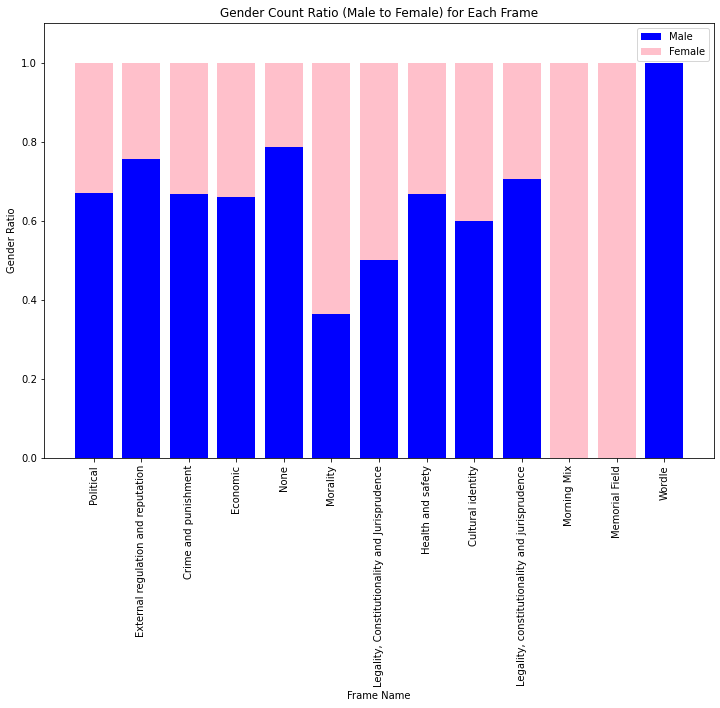

In [15]:
import matplotlib.pyplot as plt

# Calculate the ratio of male to female for each frame
gender_ratios = {frame: counts['male'] / counts['female'] if counts['female'] != 0 else float('inf') 
                 for frame, counts in gender_count_per_frame.items()}

# Create a bar plot with color segments representing the ratio of male to female counts
fig, ax = plt.subplots(figsize=(12, 8))

for frame, counts in gender_count_per_frame.items():
    male_count = counts['male']
    female_count = counts['female']
    total_count = male_count + female_count
    
    # Calculate the width of each segment
    male_width = male_count / total_count
    female_width = female_count / total_count
    
    # Plot the male segment
    ax.bar(frame, male_width, color='blue', label='Male' if frame == list(gender_count_per_frame.keys())[0] else "")
    
    # Plot the female segment
    ax.bar(frame, female_width, bottom=male_width, color='pink', label='Female' if frame == list(gender_count_per_frame.keys())[0] else "")

# Add labels and title
ax.set_xlabel('Frame Name')
ax.set_ylabel('Gender Ratio')
ax.set_title('Gender Count Ratio (Male to Female) for Each Frame')
ax.set_xticklabels(gender_ratios.keys(), rotation=90)

# Set y-axis limit
ax.set_ylim(0, 1.1)

# Add legend
ax.legend()

# Display the plot
plt.show()

{'Political': {'male': 110, 'female': 47}, 'External regulation and reputation': {'male': 37, 'female': 13}, 'Crime and punishment': {'male': 7, 'female': 5}, 'Economic': {'male': 121, 'female': 61}, 'None': {'male': 14, 'female': 6}, 'Morality': {'male': 6, 'female': 11}, 'Legality, Constitutionality and Jurisprudence': {'male': 5, 'female': 7}, 'Health and safety': {'male': 2, 'female': 1}, 'Cultural identity': {'male': 8, 'female': 5}, 'Legality, constitutionality and jurisprudence': {'male': 17, 'female': 5}, 'Morning Mix': {'male': 0, 'female': 2}, 'Memorial Field': {'male': 0, 'female': 1}, 'Wordle': {'male': 1, 'female': 0}}


<ipython-input-16-a7281e7f2f0b>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gender_ratios.keys(), rotation=90)


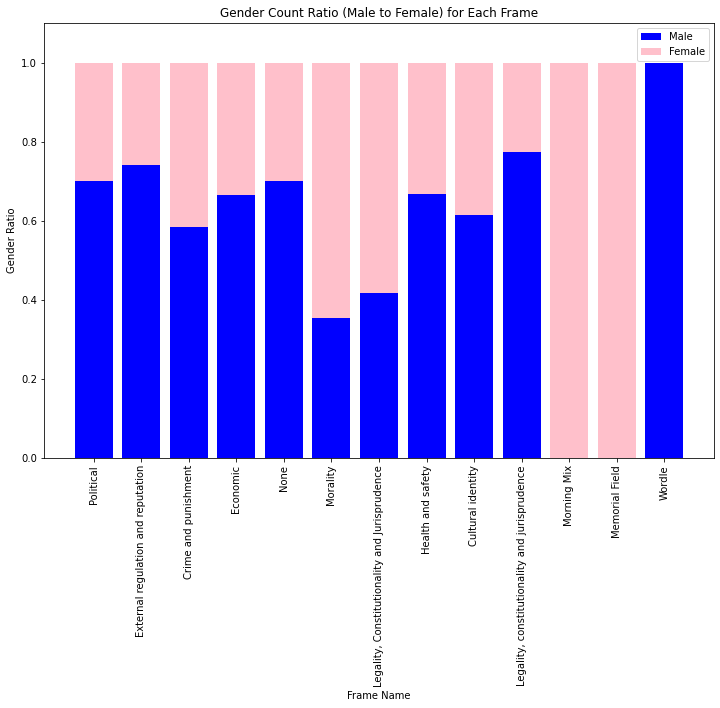

In [16]:
# Initialize a dictionary to store the count of "male" and "female" mentions for each frame_name
gender_count_per_frame = {}

# Iterate over each row in the filtered dataframe
for index, row in df_extracted.iterrows():
    frame_name = row['frame_name']
    perceived_genders = row['perceived_genders']  # Use the list directly
    
    # Count the number of times "male" and "female" are mentioned in the perceived_genders list
    male_count = perceived_genders.count('Male')
    female_count = perceived_genders.count('Female')
    
    # Update the count in the dictionary
    if frame_name in gender_count_per_frame:
        gender_count_per_frame[frame_name]['male'] += male_count
        gender_count_per_frame[frame_name]['female'] += female_count
    else:
        gender_count_per_frame[frame_name] = {'male': male_count, 'female': female_count}

# Display the count of "male" and "female" mentions for each frame_name
print(gender_count_per_frame)

# Calculate the ratio of male to female for each frame
gender_ratios = {frame: counts['male'] / counts['female'] if counts['female'] != 0 else float('inf') 
                 for frame, counts in gender_count_per_frame.items()}

# Create a bar plot with color segments representing the ratio of male to female counts
fig, ax = plt.subplots(figsize=(12, 8))

for frame, counts in gender_count_per_frame.items():
    male_count = counts['male']
    female_count = counts['female']
    total_count = male_count + female_count
    
    # Calculate the width of each segment
    male_width = male_count / total_count
    female_width = female_count / total_count
    
    # Plot the male segment
    ax.bar(frame, male_width, color='blue', label='Male' if frame == list(gender_count_per_frame.keys())[0] else "")
    
    # Plot the female segment
    ax.bar(frame, female_width, bottom=male_width, color='pink', label='Female' if frame == list(gender_count_per_frame.keys())[0] else "")

# Add labels and title
ax.set_xlabel('Frame Name')
ax.set_ylabel('Gender Ratio')
ax.set_title('Gender Count Ratio (Male to Female) for Each Frame')
ax.set_xticklabels(gender_ratios.keys(), rotation=90)

# Set y-axis limit
ax.set_ylim(0, 1.1)

# Add legend
ax.legend()

# Display the plot
plt.show()